# <center> Predicting house sale prices with Linear Regressions <center>

**Aim:** Is to develop a machine learning model to predict house sale prices as accurately as possible     

Information about the data can be found here:          
https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627              
You can read about the different columns here:         
https://s3.amazonaws.com/dq-content/307/data_description.txt


# Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000


In [2]:
df = pd.read_csv('AmesHousing.tsv', delimiter="\t")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
df.shape

(2930, 82)

## First setting up the functions

In [5]:
def transform_features(df):
    return df

In [6]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [7]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return train_mse, test_mse

## Cleaning the data

In [8]:
null_list = df.isnull().sum()
null_list

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

Lets drop columns with more than 1000 empty fields

In [9]:
keep_list = null_list[null_list < 1000].index
keep_list

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [10]:
df = df[keep_list]

In [11]:
null_list = df.isnull().sum()
null_list

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF 

For numerical columns lets return the most common values considering the contents of the columns

In [12]:
to_fix_list = df[null_list[null_list > 0].index]
to_fix_list.head()

,Lot Frontage,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Electrical,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,141.0,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,SBrkr,1.0,0.0,Attchd,1960.0,Fin,2.0,528.0,TA,TA
1,80.0,None,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,SBrkr,0.0,0.0,Attchd,1961.0,Unf,1.0,730.0,TA,TA
2,81.0,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,SBrkr,0.0,0.0,Attchd,1958.0,Unf,1.0,312.0,TA,TA
3,93.0,None,0.0,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,SBrkr,1.0,0.0,Attchd,1968.0,Fin,2.0,522.0,TA,TA
4,74.0,None,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,SBrkr,0.0,0.0,Attchd,1997.0,Fin,2.0,482.0,TA,TA


**Lets do the mean for:**               
Lot Frontage       

**Lets do the median for:**     
Garage Yr Blt       
       
**Set as 0:**       
Mas Vnr Area       
BsmtFin SF 1       
BsmtFin SF 2       
Bsmt Unf SF       
Total Bsmt SF       
Bsmt Full Bath       
Bsmt Half Bath       
Garage Cars       
Garage Area       
       
**Set as None:**       
Mas Vnr Type       
       
**Set as NA:       **             
Bsmt Qual       
Bsmt Cond       
Bsmt Exposure       
BsmtFin Type 1       
BsmtFin Type 2       
Garage Type       
Garage Finish       
Garage Qual       
Garage Cond       
       
**Set as SBrkr:**       
Electrical       

In [13]:
mean_list = ['Lot Frontage']
median_list = ['Garage Yr Blt']
zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
none_list = ['Mas Vnr Type']
NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
SBrkr_list = ['Electrical']

for col in mean_list:
    df[col] = df[col].fillna(df[col].mean())
for col in median_list:
    df[col] = df[col].fillna(df[col].median())
for col in zero_list:
    df[col] = df[col].fillna(0)
for col in none_list:
    df[col] = df[col].fillna('None')
for col in NA_list:
    df[col] = df[col].fillna('NA')
for col in SBrkr_list:
    df[col] = df[col].fillna('SBrkr')

In [14]:
null_list = df.isnull().sum()
null_list

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

No more null values

In [15]:
df.head(100)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.00000,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.00000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.00000,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.00000,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,

In [16]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

Deleting data that doesnt make sense

In [17]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [18]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [19]:
df = df.drop([1702, 2180, 2181], axis=0)

Updating some of the functions:

In [20]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

Starting the updated functions, testing only "Gr Liv Area", "SalePrice" features

In [21]:
# df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
# transform_df = transform_features(df)
# filtered_df = select_features(transform_df)
# rmse = train_and_test(filtered_df)

# rmse

## Correlation heatmap of numerical features to each other and the SalePrice

In [22]:
numerical_list = df.select_dtypes(include=['float64', 'int64'])

In [23]:
numerical_list.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


In [24]:
numerical_list.corr()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.393048,-0.204638,0.040285,-0.067498,0.036924,0.043740,0.005502,-0.058276,-0.070936,-0.129873,-0.219990,-0.250497,0.304430,0.025743,0.071166,0.014516,-0.002027,0.134997,0.176359,-0.019531,0.257685,0.033684,-0.049386,0.084896,-0.045677,-0.102769,-0.016283,-0.013309,-0.022963,-0.037988,-0.050696,-0.003451,-0.024356,0.000741,-0.018066,-0.085128
Lot Frontage,-0.393048,1.000000,0.360773,0.193587,-0.066178,0.112738,0.082747,0.195946,0.192596,0.041066,0.103417,0.320983,0.418640,0.023780,0.005330,0.343435,0.097096,-0.025822,0.163841,0.034263,0.219419,0.005678,0.319234,0.227821,0.066146,0.288737,0.334309,0.101831,0.136989,0.012800,0.025916,0.071235,0.161575,0.009534,0.007626,-0.005170,0.341151
Lot Area,-0.204638,0.360773,1.000000,0.090426,-0.033487,0.019977,0.018488,0.114982,0.180192,0.084454,0.020899,0.241353,0.321311,0.030381,0.001105,0.273741,0.122329,0.022168,0.123632,0.032169,0.138303,-0.019809,0.208241,0.254772,-0.012896,0.176246,0.207487,0.152849,0.089202,0.023004,0.016619,0.056135,0.094421,0.038013,0.000311,-0.021487,0.267520
Overall Qual,0.040285,0.193587,0.090426,1.000000,-0.093907,0.596404,0.568942,0.418972,0.278274,-0.040551,0.268760,0.545792,0.474888,0.240300,-0.048585,0.567902,0.167279,-0.044949,0.520942,0.266939,0.064220,-0.159729,0.376199,0.391604,0.540287,0.598641,0.561303,0.253120,0.290553,-0.139907,0.018537,0.042412,0.030638,-0.027685,0.028607,-0.019367,0.801206
Overall Cond,-0.067498,-0.066178,-0.033487,-0.093907,1.000000,-0.368471,0.048319,-0.132071,-0.050143,0.040846,-0.136758,-0.174840,-0.157746,0.006674,0.009123,-0.114930,-0.043252,0.084988,-0.213914,-0.087566,-0.006257,-0.086507,-0.088903,-0.031147,-0.304853,-0.181272,-0.153249,0.021046,-0.067152,0.071287,0.043804,0.043915,-0.016822,0.047066,-0.006831,0.030905,-0.101540
Year Built,0.036924,0.112738,0.019977,0.596404,-0.368471,1.000000,0.611549,0.305963,0.279569,-0.026990,0.127840,0.409489,0.310904,0.015836,-0.144265,0.239688,0.211827,-0.032004,0.468698,0.268167,-0.054858,-0.137702,0.109148,0.169559,0.787993,0.537415,0.479752,0.228135,0.194882,-0.374223,0.015941,-0.041119,0.002291,-0.028024,0.013489,-0.012476,0.558490
Year Remod/Add,0.043740,0.082747,0.018488,0.568942,0.048319,0.611549,1.000000,0.189846,0.150011,-0.061631,0.164044,0.298117,0.241128,0.158297,-0.060287,0.316236,0.134210,-0.047686,0.456567,0.210619,-0.021274,-0.142260,0.195469,0.132178,0.625800,0.423686,0.374299,0.217017,0.239191,-0.220124,0.037560,-0.046584,-0.011343,-0.018245,0.016994,0.033391,0.533007
Mas Vnr Area,0.005502,0.195946,0.114982,0.418972,-0.132071,0.305963,0.189846,1.000000,0.284305,-0.014139,0.087535,0.378545,0.376205,0.119674,-0.057375,0.387355,0.137158,0.008756,0.252318,0.186587,0.083399,-0.050531,0.267328,0.267449,0.238751,0.354942,0.365786,0.158743,0.123395,-0.109775,0.014689,0.068366,0.005143,-0.022884,-0.007199,-0.015084,0.506983
BsmtFin SF 1,-0.058276,0.192596,0.180192,0.278274,-0.050143,0.279569,0.150011,0.284305,1.000000,-0.053656,-0.487829,0.522775,0.439662,-0.167766,-0.066651,0.188245,0.644555,0.068798,0.073805,-0.012966,-0.117600,-0.087058,0.030338,0.293897,0.187602,0.252489,0.303824,0.216577,0.105248,-0.100343,0.051644,0.098336,0.085531,0.015748,-0.006633,0.024906,0.439284
BsmtFin SF 2,-0.070936,0.041066,0.084454,-0.040551,0.040846,-0.026990,-0.061631,-0.014139,-0.053656,1.000000,-0.238304,0.093368,0.088282,-0.098081,-0.005019,-0.016787,0.163861,0.099738,-0.075951,-0.032659,-0.033109,-0.037929,-0.048735,0.067587,-0.068040,-0.013775,0.004265,0.099212,-0.003918,0.032310,-0.023347,0.062897,0.044386,-0.002

## Overall correlation map

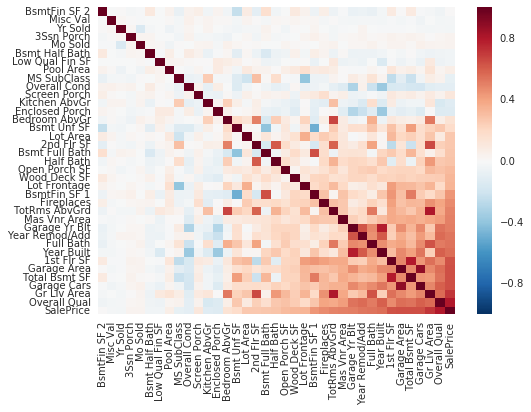

In [25]:
corrmat = numerical_list.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
strong_corrs = sorted_corrs
corrmat = numerical_list[strong_corrs.index].corr()
sns.heatmap(corrmat)

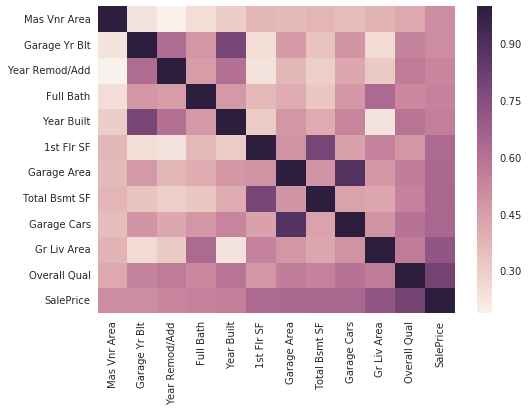

In [26]:
corrmat = numerical_list.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.5]
corrmat = numerical_list[strong_corrs.index].corr()
sns.heatmap(corrmat)

These are the features with very strong correlations with greater than 0.5       
Now for just a comparison to SalePrice

In [27]:
corrmat = numerical_list.corr()['SalePrice'].abs().sort_values(ascending=False)
corrmat.head(17)

SalePrice         1.000000
Overall Qual      0.801206
Gr Liv Area       0.717596
Garage Cars       0.648111
Total Bsmt SF     0.644012
Garage Area       0.641425
1st Flr SF        0.635185
Year Built        0.558490
Full Bath         0.546118
Year Remod/Add    0.533007
Garage Yr Blt     0.508899
Mas Vnr Area      0.506983
TotRms AbvGrd     0.498574
Fireplaces        0.474831
BsmtFin SF 1      0.439284
Lot Frontage      0.341151
Wood Deck SF      0.328183
Name: SalePrice, dtype: float64

Lets choose the correlation coefficients that are greater than 0.4

In [28]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df, co_coef_thres=0.4):
    # Using a corr threshold of 0.4 for all numerical data
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < co_coef_thres].index, axis=1)    
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    train = train.select_dtypes(include=['integer', 'float'])
    test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [29]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
filtered_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,1080.0,GasA,Fa,Y,SBrkr,1656,1656,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000,50,50
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,882.0,GasA,TA,Y,SBrkr,896,896,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000,49,49
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,1329.0,GasA,TA,Y,SBrkr,1329,1329,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000,52,52
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,2110.0,GasA,Ex,Y,SBrkr,2110,2110,2,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000,42,42
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,928.0,GasA,Gd,Y,SBrkr,928,1629,2,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900,13,12


The coding for feature transformation done above is shown to have worked within the functions and demonstrated above. 

## Categorical data

Which columns can be categorised as nominal variables and can be converted?          


In [30]:
categorical_list = filtered_df.select_dtypes(include=['object'])

# nominal_features = ["MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
#                     "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
#                     "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
#                     "Misc Feature", "Sale Type", "Sale Condition"]

In [31]:
for col in categorical_list:
    unique = categorical_list[col].value_counts()
    num = str(len(unique))
    print(col + '  ' + num)        

MS Zoning  7
Street  2
Alley  2
Lot Shape  4
Land Contour  4
Utilities  3
Lot Config  5
Land Slope  3
Neighborhood  28
Condition 1  9
Condition 2  8
Bldg Type  5
House Style  8
Roof Style  6
Roof Matl  8
Exterior 1st  16
Exterior 2nd  17
Mas Vnr Type  5
Exter Qual  4
Exter Cond  5
Foundation  6
Bsmt Qual  6
Bsmt Cond  6
Bsmt Exposure  5
BsmtFin Type 1  7
BsmtFin Type 2  7
Heating  6
Heating QC  5
Central Air  2
Electrical  5
Kitchen Qual  5
Functional  8
Fireplace Qu  5
Garage Type  7
Garage Finish  4
Garage Qual  6
Garage Cond  6
Paved Drive  3
Pool QC  4
Fence  4
Misc Feature  4
Sale Type  10
Sale Condition  6


Lets remove values above 10 in these features and see how they fair with the updates functions. This didnt work out well. Below I investigated to find that there were many correlation values close to 0 which resulted in some very high rsme values. To solve for this I will edit the function arguments to add another threshold correlation coefficient value that will be at 0.2 as a default.

In [32]:
nominal_features = ["MS Zoning", "Street", "Alley", "Land Contour", "Lot Config",
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

nominal_df = df[nominal_features]
for col in nominal_df:
    df[col] = df[col].astype('category')
df_test = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(nominal_df,axis=1)

# nominal_df.head()
corrmat = df_test.corr()['SalePrice'].abs().sort_values(ascending=False)
corrmat.head(30)

SalePrice                 1.000000
Overall Qual              0.799262
Gr Liv Area               0.706780
Garage Cars               0.647562
Garage Area               0.640138
Total Bsmt SF             0.632529
1st Flr SF                0.621676
Years Before Sale         0.558907
Year Built                0.558426
Full Bath                 0.545604
Years Since Remod         0.534940
Year Remod/Add            0.532974
Foundation_PConc          0.520966
Garage Yr Blt             0.508882
Mas Vnr Area              0.502196
TotRms AbvGrd             0.495474
Fireplaces                0.474558
BsmtFin SF 1              0.433147
Mas Vnr Type_None         0.394743
Garage Type_Detchd        0.365074
Sale Type_New             0.354292
Sale Condition_Partial    0.350122
Foundation_CBlock         0.349642
Garage Type_Attchd        0.345635
Lot Frontage              0.340751
Wood Deck SF              0.327143
Open Porch SF             0.312951
Mas Vnr Type_Stone        0.304290
MS Zoning_RM        

In [33]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df, co_coef_thres=0.4):
    # Using a corr threshold of 0.4 for all numerical data
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < co_coef_thres].index, axis=1) 
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    train = train.select_dtypes(include=['integer', 'float'])
    test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [34]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

36612.04498472166

In [35]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df, co_coef_thres=0.4):
    # Using a corr threshold of 0.4 for all numerical data
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < co_coef_thres].index, axis=1) 
    
    # Adding all the categorical columns 
    categorical_list = df.select_dtypes(include=['object'])
    for col in categorical_list:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(categorical_list ,axis=1)
    
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    train = train.select_dtypes(include=['integer', 'float'])
    test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [36]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

181213850.45369002

Obviously a high rmse score including all of the categories with type object is not desirable. Lets limit the list by looking at the documentation

In [37]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df, co_coef_thres=0.4):
    # Using a corr threshold of 0.4 for all numerical data
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < co_coef_thres].index, axis=1) 
    
    # Adding all the categorical columns 
    nominal_features = ["MS Zoning", "Street", "Alley", "Land Contour", "Lot Config",
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    categorical_list = df[nominal_features]        
    # Lets not select all columns that are of the type object
    # categorical_list = df.select_dtypes(include=['object'])
    for col in categorical_list:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(categorical_list ,axis=1)
    
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Selecting numerical values
    train = train.select_dtypes(include=['integer', 'float'])
    test = test.select_dtypes(include=['integer', 'float'])
    
    # Selecting features
    features = train.columns.drop("SalePrice")
    
    # ML
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])
    
    train_mse = mean_squared_error(train_predictions, train['SalePrice'])
    test_mse = mean_squared_error(test_predictions, test['SalePrice'])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [38]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

35456.25618196884

This has slightly improved the result. Lets keep this and continue. If given more time, one could revisit this and optimise the selection of columns

# Implementing k-folds into the functions

In [46]:
def transform_features(df):
    mean_list = ['Lot Frontage']
    median_list = ['Garage Yr Blt']
    zero_list = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
    none_list = ['Mas Vnr Type']
    NA_list = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    SBrkr_list = ['Electrical']

    for col in mean_list:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_list:
        df[col] = df[col].fillna(df[col].median())
    for col in zero_list:
        df[col] = df[col].fillna(0)
    for col in none_list:
        df[col] = df[col].fillna('None')
    for col in NA_list:
        df[col] = df[col].fillna('NA')
    for col in SBrkr_list:
        df[col] = df[col].fillna('SBrkr')
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    return df

def select_features(df, co_coef_thres=0.4, co_coef_thres_2=0.2):
    # Using a corr threshold of 0.4 for all numerical data
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < co_coef_thres].index, axis=1) 
    
    # Adding all the categorical columns 
    nominal_features = ["MS Zoning", "Street", "Alley", "Land Contour", "Lot Config",
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    categorical_list = df[nominal_features]        
    # Lets not select all columns that are of the type object
    # categorical_list = df.select_dtypes(include=['object'])
    for col in categorical_list:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(categorical_list ,axis=1)
    
    # Here I insert a correlation coefficient cutoff
    corr_coeffs = df.corr()['SalePrice'].abs().sort_values(ascending=False)
    df = df.drop(corr_coeffs[corr_coeffs < co_coef_thres_2].index, axis=1)
    
    return df

def train_and_test(df, k=0):
    # ML
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        # Selecting numerical values
        train = train.select_dtypes(include=['integer', 'float'])
        test = test.select_dtypes(include=['integer', 'float'])
        features = train.columns.drop('SalePrice')

        # ML
        lr.fit(train[features], train['SalePrice'])

        train_predictions = lr.predict(train[features])
        test_predictions = lr.predict(test[features])

        train_mse = mean_squared_error(train_predictions, train['SalePrice'])
        test_mse = mean_squared_error(test_predictions, test['SalePrice'])
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)

        return test_rmse
    
    if k == 1:
        # shuffle the DataFrame rows
        df = df.sample(frac = 1)
        
        fold_1 = df[:1460]
        fold_2 = df[1460:]
        
        ## Fold_1
        # Selecting numerical values
        train = fold_1.select_dtypes(include=['integer', 'float'])
        test = fold_2.select_dtypes(include=['integer', 'float'])
        features = train.columns.drop('SalePrice')

        # ML
        lr.fit(train[features], train['SalePrice'])

        train_predictions = lr.predict(train[features])
        test_predictions = lr.predict(test[features])

        train_mse = mean_squared_error(train_predictions, train['SalePrice'])
        test_mse = mean_squared_error(test_predictions, test['SalePrice'])
        train_rmse = np.sqrt(train_mse)
        fold_1_rmse = np.sqrt(test_mse)
        
        ## Fold_2
        # Selecting numerical values
        train = fold_2.select_dtypes(include=['integer', 'float'])
        test = fold_1.select_dtypes(include=['integer', 'float'])
        features = train.columns.drop('SalePrice')

        # ML
        lr.fit(train[features], train['SalePrice'])

        train_predictions = lr.predict(train[features])
        test_predictions = lr.predict(test[features])

        train_mse = mean_squared_error(train_predictions, train['SalePrice'])
        test_mse = mean_squared_error(test_predictions, test['SalePrice'])
        train_rmse = np.sqrt(train_mse)
        fold_2_rmse = np.sqrt(test_mse)
        
        print(fold_1_rmse)
        print(fold_2_rmse)
        avg_rmse = (fold_1_rmse + fold_2_rmse) / 2
        
        return avg_rmse        
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            # Selecting numerical values
            train = train.select_dtypes(include=['integer', 'float'])
            test = test.select_dtypes(include=['integer', 'float'])
            features = train.columns.drop('SalePrice')            

            lr.fit(train[features], train['SalePrice'])
            
            predictions = lr.predict(test[features])
            
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
            
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
        

### Example of when K = 0

In [40]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=0)
rmse

35812.999127646806

### K = 1

In [41]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=1)
rmse

31224.815910662543
33722.89885444862


32473.85738255558

### K = 4

In [59]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, co_coef_thres_2=0.3)
rmse = train_and_test(filtered_df, k=4)
rmse

[28726.166424649404, 28222.151523795572, 39619.799617337114, 30640.386563944914]


31802.126032431755

## Summary

To summarise, I was able to show the importing, cleaning and examination of the data features were appropriate for a prediction of the house sale prices using the machine learning Linear Regression. With further function refinement, I believe better rsme scores could be achieved but scores of in the 20k were achieved. 

Thank you for reading and have a great week!              
With best regards,                
Bill         